In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat=pd.read_csv('Iris.csv')

dat[0:10]

In [4]:
dat.shape

(150, 5)

In [5]:
dat[0:10]

x1   x2   x3   x4        class
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
5  5.4  3.9  1.7  0.4  Iris-setosa
6  4.6  3.4  1.4  0.3  Iris-setosa
7  5.0  3.4  1.5  0.2  Iris-setosa
8  4.4  2.9  1.4  0.2  Iris-setosa
9  4.9  3.1  1.5  0.1  Iris-setosa

In [6]:
list (dat.columns)

['x1', 'x2', 'x3', 'x4', 'class']

In [8]:
dat.dtypes

x1       float64
x2       float64
x3       float64
x4       float64
class     object
dtype: object

In [10]:
dat.describe()

x1          x2          x3          x4
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

In [12]:
dat['class'].describe()

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: class, dtype: object

In [13]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
x1       150 non-null float64
x2       150 non-null float64
x3       150 non-null float64
x4       150 non-null float64
class    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
dat

x1   x2   x3   x4           class
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
5    5.4  3.9  1.7  0.4     Iris-setosa
6    4.6  3.4  1.4  0.3     Iris-setosa
7    5.0  3.4  1.5  0.2     Iris-setosa
8    4.4  2.9  1.4  0.2     Iris-setosa
9    4.9  3.1  1.5  0.1     Iris-setosa
10   5.4  3.7  1.5  0.2     Iris-setosa
11   4.8  3.4  1.6  0.2     Iris-setosa
12   4.8  3.0  1.4  0.1     Iris-setosa
13   4.3  3.0  1.1  0.1     Iris-setosa
14   5.8  4.0  1.2  0.2     Iris-setosa
15   5.7  4.4  1.5  0.4     Iris-setosa
16   5.4  3.9  1.3  0.4     Iris-setosa
17   5.1  3.5  1.4  0.3     Iris-setosa
18   5.7  3.8  1.7  0.3     Iris-setosa
19   5.1  3.8  1.5  0.3     Iris-setosa
20   5.4  3.4  1.7  0.2     Iris-setosa
21   5.1  3.7  1.5  0.4     Iris-setosa
22   4.6  3.6  1.0  0.2     Iris-setosa
23   5.1  3.3  1.7  0.5     Iris-setosa
24   4.8  3.4  1.9  0.2     Iris-setosa
25   5.0  3.0  1.6  0.2     Iris-setosa
26   5.0  3.4  1.6  0.4     Iris-setosa
27   5.2  3.5  1.5  0.2     Iris-setosa
28   5.2  3.4  1.4  0.2     Iris-setosa
29   4.7  3.2  1.6  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
120  6.9  3.2  5.7  2.3  Iris-virginica
121  5.6  2.8  4.9  2.0  Iris-virginica
122  7.7  2.8  6.7  2.0  Iris-virginica
123  6.3  2.7  4.9  1.8  Iris-virginica
124  6.7  3.3  5.7  2.1  Iris-virginica
125  7.2  3.2  6.0  1.8  Iris-virginica
126  6.2  2.8  4.8  1.8  Iris-virginica
127  6.1  3.0  4.9  1.8  Iris-virginica
128  6.4  2.8  5.6  2.1  Iris-virginica
129  7.2  3.0  5.8  1.6  Iris-virginica
130  7.4  2.8  6.1  1.9  Iris-virginica
131  7.9  3.8  6.4  2.0  Iris-virginica
132  6.4  2.8  5.6  2.2  Iris-virginica
133  6.3  2.8  5.1  1.5  Iris-virginica
134  6.1  2.6  5.6  1.4  Iris-virginica
135  7.7  3.0  6.1  2.3  Iris-virginica
136  6.3  3.4  5.6  2.4  Iris-virginica
137  6.4  3.1  5.5  1.8  Iris-virginica
138  6.0  3.0  4.8  1.8  Iris-virginica
139  6.9  3.1  5.4  2.1  Iris-virginica
140  6.7  3.1  5.6  2.4  Iris-virginica
141  6.9  3.1  5.1  2.3  Iris-virginica
142  5.8  2.7  5.1  1.9  Iris-virginica
143  6.8  3.2  5.9  2.3  Iris-virginica
144  6.7  3.3  5.7  2.5  Iris-virginica
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]

In [17]:
dat.x1.value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: x1, dtype: int64

In [18]:
dat.x1.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: x1, dtype: float64

In [19]:
dat.x1.min()

4.3

In [20]:
dat.x1.max()

7.9

In [21]:
sum=dat.x1.sum()
count=dat.x1.count()
mean=sum/count

In [22]:
mean

5.843333333333335

In [23]:
dat.x1.mean()

5.843333333333335

In [31]:
sd=0
for value in dat.x1 :
    sd +=(float(value)-mean)**2
sd =math.sqrt(sd/(count-1))

In [32]:
sd

0.8280661279778629

In [34]:
range = dat.x1.max()-dat.x1.min()

In [36]:
range

3.6000000000000005

In [37]:
variance = sd*sd

In [38]:
variance

0.6856935123042505

In [39]:
dat.x1.quantile(0.1)

4.8

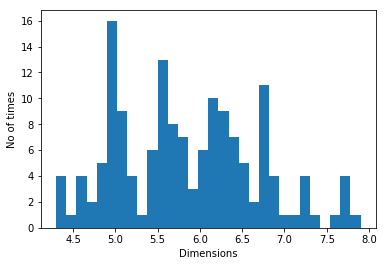

In [41]:
plt.hist(dat['x1'],bins=30)
plt.xlabel('Dimensions')
plt.ylabel('No of times')
plt.show()

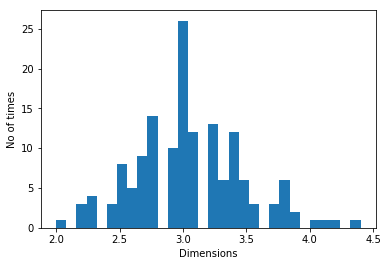

In [42]:
plt.hist(dat['x2'],bins=30)
plt.xlabel('Dimensions')
plt.ylabel('No of times')
plt.show()

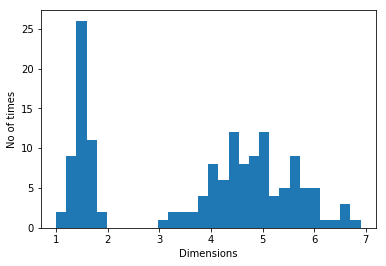

In [43]:
plt.hist(dat['x3'],bins=30)
plt.xlabel('Dimensions')
plt.ylabel('No of times')
plt.show()

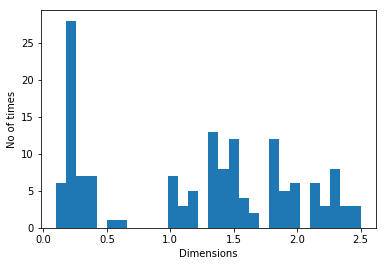

In [44]:
plt.hist(dat['x4'],bins=30)
plt.xlabel('Dimensions')
plt.ylabel('No of times')
plt.show()

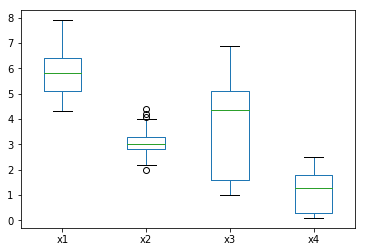

In [45]:
dat.plot(kind='box',subplots=False)

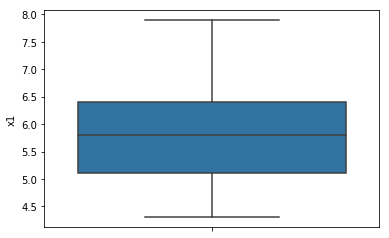

In [46]:
sns.boxplot(y=dat['x1'])

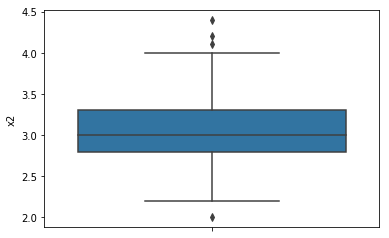

In [47]:
sns.boxplot(y=dat['x2'])

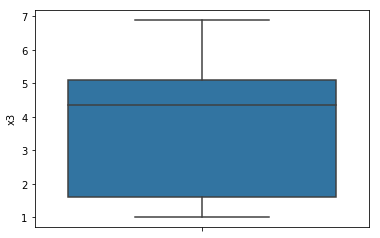

In [48]:
sns.boxplot(y=dat['x3'])

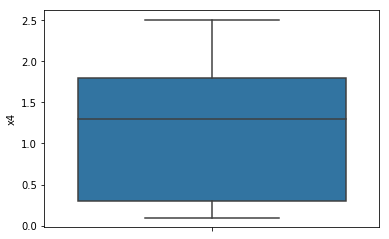

In [49]:
sns.boxplot(y=dat['x4'])

/home/adminss/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


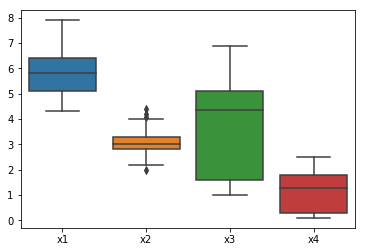

In [50]:
sns.boxplot(data=dat.ix[:,0:4])

In [51]:
dat.loc[:,x1].std()

0.8280661279778629

In [52]:
dat.loc[:,x1].var()

0.6856935123042505

In [53]:
dat.var()

x1    0.685694
x2    0.188004
x3    3.113179
x4    0.582414
dtype: float64

In [54]:
dat.std()

x1    0.828066
x2    0.433594
x3    1.764420
x4    0.763161
dtype: float64